In [1]:
import tensorflow as tf
from tensorflow import random
import matplotlib.pyplot as plt


2022-02-28 14:45:50.237449: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-28 14:45:50.237479: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
generator = tf.keras.models.load_model('datas/generator.h5')

2022-02-28 14:45:52.537371: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-28 14:45:52.537405: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-28 14:45:52.537429: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Inspiron-5558): /proc/driver/nvidia/version does not exist
2022-02-28 14:45:52.537678: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
generator.compile()

In [4]:
def plot_examples(images_at_scales):
    n_examples = images_at_scales[0].shape[0]
    fig, axes = plt.subplots(figsize=(5, n_examples), nrows=n_examples, ncols=5, dpi=200)
    for i in range(n_examples):
        for j in range(5):
            generated_images = images_at_scales[4-j]
            gen_1 = generated_images[i].numpy()*127.5+127.5
            axes[i, j].axis('off')
            axes[i, j].imshow((gen_1).astype("uint32"), interpolation='none')
    plt.show()

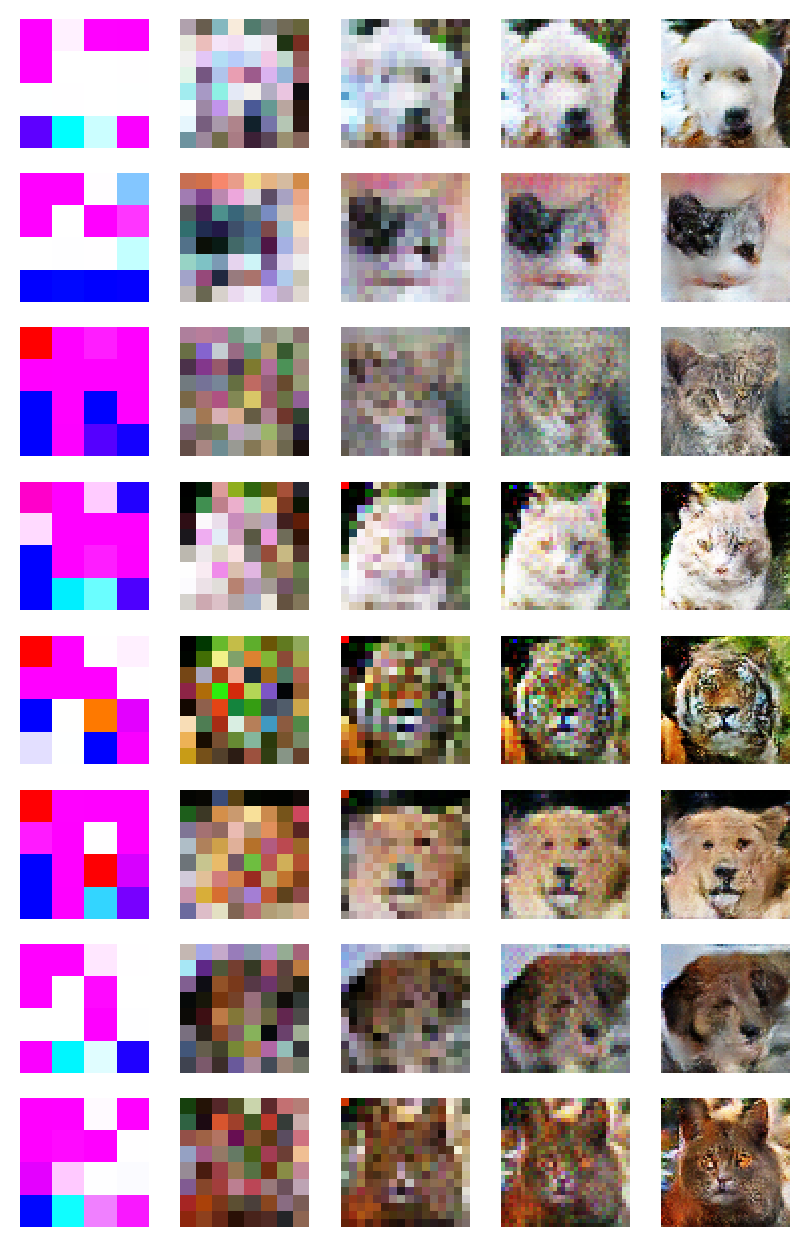

In [5]:
latent_dim = 100

noises = random.normal([8, latent_dim])
example_images = generator(noises, training=False)

plot_examples(example_images)